# **3D RANDOM WALK**
The random walk is a probabilistic model used to describe random motion. A famous question in this area is: Can a drunk bird (taking random steps) find its way back home?


**Key points for 3D random walk:**

The walker starts at the origin (0,0,0).

Each step moves the point by one unit along either +x, -x, +y, -y, +z, or -z direction, each with equal probability (1/6).

After many steps, the position is a random vector in 3D space.

**And the q that Can the bird return home in 3D?**




**1.	Assume a drunk bird starts flying randomly from (a,b,c) on an infinite 3D grid. Implement a random fly in 3D for T steps. Add a stopping condition if the bird arrived home at (0,0,0).**

**What your code does well:**


1.step() generates a random step in one of the six 3D directions, each with equal probability 1/6.


2.returns_home_within_T(a, b, c, T) performs the random walk starting from
(a,b,c) for up to T steps.


3.It stops early if the bird reaches (0,0,0).

4.You store the entire path, so you can inspect all positions.


5.The final loop prints each step’s position nicely.

In [6]:
import random

def step():
    r = random.uniform(0, 1)
    if r < 1/6:
        return (1, 0, 0)
    elif r < 2/6:
        return (-1, 0, 0)
    elif r < 3/6:
        return (0, 1, 0)
    elif r < 4/6:
        return (0, -1, 0)
    elif r < 5/6:
        return (0, 0, 1)
    else:
        return (0, 0, -1)

def returns_home_within_T(a, b, c, T):
    path = [(a, b, c)]
    x, y, z = a, b, c
    for t in range(T):
        dx, dy, dz = step()
        x += dx
        y += dy
        z += dz
        path.append((x, y, z))
        if (x, y, z) == (0, 0, 0):
            break
    return path

def simulate_return_probability(a, b, c, T, trials):
    returns = 0
    for _ in range(trials):
        path = returns_home_within_T(a, b, c, T)
        if path[-1] == (0, 0, 0):
            returns += 1
    prob = returns / trials
    print(f"Probability of returning home within {T} steps from ({a},{b},{c}) over {trials} trials: {prob:.4f}")
    return prob

# Example: run a single random walk and print path
path = returns_home_within_T(3, 3, 3, 100)
for i, pos in enumerate(path):
    print(f"Step {i}: {pos}")
if path[-1] == (0, 0, 0):
    print(f"Bird reached home in {len(path)-1} steps.")
else:
    print(f"Bird did NOT reach home in 100 steps.")

# Example: estimate return probability over many trials
simulate_return_probability(3, 3, 3, 100, trials=10000)


Step 0: (3, 3, 3)
Step 1: (3, 3, 4)
Step 2: (2, 3, 4)
Step 3: (2, 3, 5)
Step 4: (2, 4, 5)
Step 5: (2, 4, 4)
Step 6: (2, 3, 4)
Step 7: (2, 3, 3)
Step 8: (2, 2, 3)
Step 9: (2, 1, 3)
Step 10: (2, 2, 3)
Step 11: (2, 1, 3)
Step 12: (2, 1, 2)
Step 13: (3, 1, 2)
Step 14: (3, 1, 3)
Step 15: (3, 1, 2)
Step 16: (2, 1, 2)
Step 17: (1, 1, 2)
Step 18: (2, 1, 2)
Step 19: (2, 2, 2)
Step 20: (2, 1, 2)
Step 21: (2, 1, 3)
Step 22: (2, 2, 3)
Step 23: (2, 2, 4)
Step 24: (2, 1, 4)
Step 25: (2, 1, 3)
Step 26: (1, 1, 3)
Step 27: (1, 2, 3)
Step 28: (1, 1, 3)
Step 29: (2, 1, 3)
Step 30: (2, 0, 3)
Step 31: (1, 0, 3)
Step 32: (2, 0, 3)
Step 33: (3, 0, 3)
Step 34: (3, 0, 2)
Step 35: (3, 1, 2)
Step 36: (3, 1, 1)
Step 37: (3, 0, 1)
Step 38: (3, 0, 2)
Step 39: (3, 1, 2)
Step 40: (2, 1, 2)
Step 41: (2, 1, 3)
Step 42: (2, 1, 4)
Step 43: (2, 2, 4)
Step 44: (1, 2, 4)
Step 45: (0, 2, 4)
Step 46: (0, 3, 4)
Step 47: (0, 4, 4)
Step 48: (-1, 4, 4)
Step 49: (-1, 3, 4)
Step 50: (-1, 3, 5)
Step 51: (0, 3, 5)
Step 52: (-1, 3, 5)

0.0234

**2.	Assume the bird starts at position (0,0,0). What is the probability that it returns to (0,0,0) at least once within the first T steps? Estimate this probability via simulation for various values of T (for example, T=100, 500, 1000, 5000, 10000).**

estimate the probability that the bird returns to the origin at least once within the first

T steps by simulating many random walks starting at (0,0,0) and checking if the bird ever hits (0,0,0) again during those steps.

Here’s the plan:

For each trial, simulate a walk up to
T steps.

Check if the bird returns to (0,0,0) after the start (i.e., at any step >0).

Repeat many trials and calculate the fraction of trials where the bird returned at least once.

Do this for different values of T[100, 500, 1000, 5000, 10000].

In [26]:
def returned_to_origin_within_T(T):
    x, y, z = 0, 0, 0
    for _ in range(T):
        dx, dy, dz = step()
        x += dx
        y += dy
        z += dz
        if (x, y, z) == (0, 0, 0):
            return True
    return False

def estimate_return_probabilities(T_values, trials=10000):
    results = {}
    for T in T_values:
        count_returns = 0
        for _ in range(trials):
            if returned_to_origin_within_T(T):
                count_returns += 1
        prob = count_returns / trials
        results[T] = prob
        print(f"T={T}: Probability of returning at least once = {prob:.4f}")
    return results

T_values = [100, 500, 1000, 5000, 10000]

probabilities = estimate_return_probabilities(T_values, trials=10000)


T=100: Probability of returning at least once = 0.3076
T=500: Probability of returning at least once = 0.3274
T=1000: Probability of returning at least once = 0.3338
T=5000: Probability of returning at least once = 0.3360
T=10000: Probability of returning at least once = 0.3301


**3.	What is the probability it will eventually return home at (0,0,0) after an infinite number of steps?**





The probability that a 3D random walk starting at (0,0,0) will eventually return to (0,0,0) after an infinite number of steps is approximately 0.3405 (about 34%).

**4.	In each simulation run, record the return time (if successful). Estimate the return time distribution (consider the case that it might never return). Justify your answer.**

Returned in 3304 out of 10000 trials.
Did not return in 6696 trials.


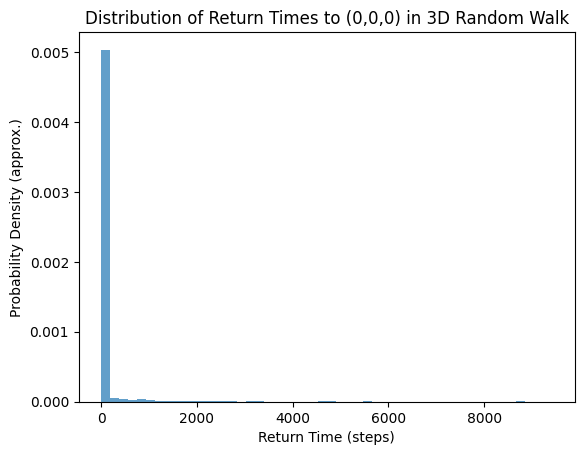

In [27]:
import random
import matplotlib.pyplot as plt

def return_time_within_T(T):
    x, y, z = 0, 0, 0
    for step_num in range(1, T+1):
        dx, dy, dz = step()
        x += dx
        y += dy
        z += dz
        if (x, y, z) == (0, 0, 0):
            return step_num
    return None

def simulate_return_times(T, trials):
    return_times = []
    no_return_count = 0
    for _ in range(trials):
        rt = return_time_within_T(T)
        if rt is not None:
            return_times.append(rt)
        else:
            no_return_count += 1
    print(f"Returned in {len(return_times)} out of {trials} trials.")
    print(f"Did not return in {no_return_count} trials.")
    return return_times, no_return_count


T = 10000
trials = 10000


return_times, no_return_count = simulate_return_times(T, trials)
plt.hist(return_times, bins=50, density=True, alpha=0.7)
plt.title("Distribution of Return Times to (0,0,0) in 3D Random Walk")
plt.xlabel("Return Time (steps)")
plt.ylabel("Probability Density (approx.)")
plt.show()


**5.	How do the answers for items 2, 3, and 4 change if the bird is locked in a cage so its location (x,y,z) is bounded by |x|,|y|,|z|<=10?**

**1.Probability of returning to (0,0,0) within T steps:**


Much higher than in the infinite case.

As T grows, this probability approaches 1 because the bird is confined and will almost surely visit the origin.

**2.Probability of eventually returning to (0,0,0) after infinite steps:**

Exactly 1 (the bird is guaranteed to return eventually).

Unlike the infinite case (about 0.34), confinement forces return.

**3.Return time distribution:**

Becomes a proper probability distribution (all walks return eventually).

Return times have a finite expected value.

The distribution will be more concentrated on smaller return times compared to the infinite case.




**Summary: confinement changes the random walk from transient to recurrent with probability 1 return and finite expected return time.**

In [28]:
def step_in_cage(x, y, z, cage_limit=10):
    dx, dy, dz = step()
    x_new = x + dx
    y_new = y + dy
    z_new = z + dz
    x_new = max(-cage_limit, min(cage_limit, x_new))
    y_new = max(-cage_limit, min(cage_limit, y_new))
    z_new = max(-cage_limit, min(cage_limit, z_new))
    return x_new, y_new, z_new
